# Wrangle and Analyze Data

## Purpose
In this Notebook you will find analyzing  of three dataset for WeGetRate Twitter Account 
## Methodology
- Gathering  Data
- Assessing Data 
- Cleaning data using (define-code-test) framewor
- Analyzing Data

# Setup

## Library import
We import all the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import json
#import tweepy
%matplotlib inline

## Local library import
We import all the required local libraries libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [2]:
#Load and read first dataset 
tweet_archive= pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Request second dataset
tweet2 = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
# Open the content from the requested tsv dataset becsues the data type is in byte we have to write the content than open/read it with
with open('image-predictions.tsv', mode = 'wb') as f:
    f.write(tweet2.content)
# Save it into datafram to help in reading and manuplatie data 
image_predictions= pd.read_csv("image-predictions.tsv",sep='\t')

This is a code for importing tweets from Twitter API below inside of API we use JSON file provided from Udacity

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
#Request dataset from url
tweeturl='https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json' 
tweet3 = requests.get(tweeturl)

In [7]:
#Cheack the request statuses 
print(tweet3)

<Response [200]>


In [8]:
# Open the json file with read mode 
tweet_list = []
with open('tweet-json.txt','r') as file:
   #Loop in each line in the json file after load them all, and save them into var and than save into list   
    for line in file:
        data = json.loads(line)
        #load each inne into variable 
        tweet_list.append({'tweet_id': data['id'],
                        'retweet_num': data['retweet_count'],
                        'favorite_num': data['favorite_count'], 
                          'followers_num': data['user']['followers_count']})
 #To know which types of coulmens we hava
 #keys = data.keys()
           
# parsed list data into dataframe      
tweets = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_num', 'favorite_num','followers_num' ])
#Showing the dataframe
tweets.head()

,tweet_id,retweet_num,favorite_num,followers_num
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

# Assessing Data
Put here the core of the notebook. Feel free to further split this section into subsections.

### Visual assessment


In [9]:
tweet_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
tweets.head(10)

,tweet_id,retweet_num,favorite_num,followers_num
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [11]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic assessment

    1- Tweet archive

In [12]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
## calculating the number of nulls in each column
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# calculating the number of duplicated values for the whole dataset
tweet_archive.duplicated().sum()

0

In [15]:
## calculating the number of columns and rows in dataset
tweet_archive.shape

(2356, 17)

In [16]:
# calculating the number of unique values per column
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
# calculating the mean , max , min , count for each column 
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# calculating the mean , top , freguancy for strings, objects column's data type
tweet_archive.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [19]:
# calculating the number of frq he / He / She/she in the text column, to know their gender but I think we don't get any good results, because they describe their dogs in multiple sentences  
tweet_archive['text'].str.contains('he').sum()

1518

In [20]:
tweet_archive['text'].str.contains('He').sum()

1144

In [21]:
tweet_archive['text'].str.contains('she').sum()

102

In [22]:
tweet_archive['text'].str.contains('She').sum()

329

In [23]:
# Show a sample of text , Looks unorganiazed 
tweet_archive.text.sample(20)

1531    This pupper can only sleep on shoes. It's a cr...
2253    Dogs only please. Small cows and other non can...
223     This is Noosh. He noticed you were in the show...
1325    This is Dexter. He's a shy pup. Doesn't bark m...
2117             Meet Herb. 12/10 https://t.co/tLRyYvCci3
1300    This is Jiminus. He's in a tub for some reason...
776     This is Sampson. He's about to get hit with a ...
976     Meet Jax &amp; Jil. Jil is yelling the pledge ...
925     This is Watson. He trust falls on command. 13/...
235     This is Cannon. He just heard something behind...
550     This is Django. He accidentally opened the fro...
1376    Please pray for this pupper. Nothing wrong wit...
1319    Please enjoy this pup in a cooler. Permanently...
731     This is Combo. The daily struggles of being a ...
1160    This is Luther. He saw a ghost. Spooked af. 11...
2010    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1167    This is Panda. He's happy af. 11/10 https://t....
715     This i

In [24]:
# calculating the number of columns that Start with RT, assuming that RT means = retweet , i think these tweets are expanded meaning that they retweet with comment
tweet_archive['text'].str.contains('RT').sum()

192

In [25]:
#Total number of tweets that retweeted 
tweet_archive['retweeted_status_id'].nunique()

181

In [26]:
# Some of tweets retweeted many times or it has same value which is null= (nan)
#tweet_archive['retweeted_status_id'].isnull().sum() = 2174
tweet_archive['retweeted_status_id'].duplicated().sum()

2174

In [27]:
# Show the id for the 181 retweetd 
tweet_archive['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [28]:
# If we assume that duplicated expanded urls means it has been retweeted inculding commentes ( thr image of the dog)
# Calaculate the numbers of expanded urls ( may contines duplicated or null value)
tweet_archive['expanded_urls'].duplicated().sum()

137

In [29]:
tweet_archive['expanded_urls'].isnull().sum()

59

In [30]:
# Show sample to approve 
tweet_archive[tweet_archive[['expanded_urls']].duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [31]:
# Show the unique number of dog images  or tweets with images so they are not a comment or retweet
tweet_archive['expanded_urls'].nunique()

2218

In [32]:
# Lets show the expanded urls along with text to know if they are comment or retweets 
#Creating mask for the duplicated = retweeted or commented (If ‘last’, it considers last value as unique and rest of the same values as duplicate. )
mask = tweet_archive.duplicated(subset='expanded_urls', keep= 'last')
# Show the tow coulmens after apply the mask and drop the null
tweet_archive[['expanded_urls', 'text']][mask].dropna()

,expanded_urls,text
68,https://twitter.com/dog_rates/status/878057613...,RT @dog_rates: This is Emmy. She was adopted t...
73,"https://www.gofundme.com/3yd6y1c,https://twitt...",RT @dog_rates: Meet Shadow. In an attempt to r...
74,https://twitter.com/dog_rates/status/669000397...,RT @dog_rates: Meet Terrance. He's being yelle...
91,https://twitter.com/dog_rates/status/866334964...,RT @dog_rates: This is Coco. At first I though...
97,https://www.gofundme.com/help-my-baby-sierra-g...,RT @dog_rates: This is Sierra. She's one preci...
...,...,...
860,https://twitter.com/dog_rates/status/673295268...,RT @dog_rates: Meet Eve. She's a raging alcoho...
937,https://twitter.com/dog_rates/status/681523177...,RT @dog_rates: This is Carly. She's actually 2...
1012,https://twitter.com/dog_rates/status/704761120...,RT @dog_rates: This pupper killed this great w...
1023,https://twitter.com/dog_rates/status/667866724...,RT @dog_rates: This is Shaggy. He knows exactl...


In [33]:
# calculating the number of duplicated of tweets 
tweet_archive['tweet_id'].duplicated().sum()

0

In [34]:
# calculating the number of duplicated of sources in each category  , looks messy we have to extract the source from the link text
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
# calculating the number of value for each names 
# This to display the whole result 
pd.set_option("display.max_rows", None)
tweet_archive['name'].value_counts().sort_values(ascending=False)

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
an                  7
Bailey              7
Buddy               7
Daisy               7
Dave                6
Milo                6
Jax                 6
Scout               6
Jack                6
Koda                6
Bella               6
Rusty               6
Stanley             6
Oscar               6
Leo                 6
Bentley             5
Larry               5
George              5
Finn                5
Oakley              5
very                5
Phil                5
Sunny               5
Chester             5
Gus                 5
Sammy               5
Louis               5
Alfie               5
one                 4
Sophie              4
Sampson             4
Boomer    

In [36]:
# Find the rating denminoater and it seems there are outliers value ( greater than 10 like 120)
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [37]:
# We have less than 10
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [38]:
# Find the numbers in each dog's stage 
#doggo,floofer,pupper,puppo
tweet_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [39]:
tweet_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
tweet_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
tweet_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [42]:
#As showen above most of them are in 'pupper'stage , but i think we have some dogs with no stage , may after cleaning will find out 

> Quality issues identified in the tweet archive table:
- Many missing values retweeted_status_id, as well as expanded_urls with non or null 
- The source value is messy and needs extracting the source only to read it easily 
- Incorrect data type of "timestamp".
- There is an abnormal value in rating_numerator such as  1776, 960, 666
- There is an outlier in the rating_denominator like 170 instead it should 10 
- Some of the values in the name column are incorrect such as: "None", "The", "an"
- May we have non-value (stages) for some dogs so we need to create a helper column to find how much 
- retweeted_status_id  and retweeted_status_user_id are floats when they show be int 
- (Remove from dataset retweets and replies )
- The text column is not clear, it contains clear we can extract the gender of dogs 
> Tidiness issues identified in tweet archive table:
- The stages of dogs defined in multiple columns

    2- Image model prediction 

In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
image_predictions.shape

(2075, 12)

In [45]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [46]:
image_predictions.duplicated().any()

False

In [47]:
image_predictions.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [48]:
# Confirm that both tweet_id are same 
image_predictions['tweet_id'].equals(tweet_archive['tweet_id'])

False

In [49]:
image_predictions[image_predictions[['jpg_url']].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [50]:
#This is a sampe of duplicated URL of image even if the tweet_id is different 
image_predictions[image_predictions['jpg_url']=='https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [51]:
# Show a sample of image that duplicated 
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg')

In [52]:
#Show the most predictions dog's breed from the nueral model in the first try
image_predictions['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [53]:
#Show the most predictions dog's breed from the nueral model in the second try
image_predictions['p2'].value_counts()[:10]

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

In [54]:
#Show the most predictions dog's breed from the nueral model in the third try
image_predictions['p3'].value_counts()[:10]

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
beagle                       31
cocker_spaniel               31
Name: p3, dtype: int64

In [55]:
#Find the best p
def number_false(column_name):
    filter_p = image_predictions[column_name] == True
    print(len(image_predictions[filter_p]))

In [56]:
# Find out which is the best try for the algorithm or the model, the second one it showed the less error 
number_false("p1_dog")
number_false("p2_dog")
number_false("p3_dog")

1532
1553
1499


In [57]:
# Confir, if the p2 is the accourate predications of the dog 
image_predictions[['p1', 'p2' ,'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']].sample(10)

,p1,p2,p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf
1085,Labrador_retriever,German_short-haired_pointer,Chesapeake_Bay_retriever,True,True,True,0.584580,0.340657,0.031975
1799,Pembroke,Cardigan,Appenzeller,True,True,True,0.624802,0.362861,0.003926
1328,seat_belt,golden_retriever,Tibetan_mastiff,False,True,True,0.523926,0.087800,0.075127
1607,Pembroke,Cardigan,Chihuahua,True,True,True,0.828904,0.167373,0.000766
1409,maillot,maillot,golden_retriever,False,False,True,0.580528,0.081449,0.053570
1345,Irish_terrier,briard,soft-coated_wheaten_terrier,True,True,True,0.254856,0.227716,0.223263
326,Labrador_retriever,golden_retriever,seat_belt,True,True,False,0.567933,0.349401,0.069396
953,collie,chow,Pomeranian,True,True,True,0.457672,0.279101,0.076922
782,Samoyed,Great_Pyrenees,teddy,True,True,False,0.270287,0.114027,0.072475
413,pug,Brabancon_griffon,Chihuahua,True,True,True,0.586161,0.082744,0.045878


In [58]:
# Most of the tweets with one image 
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

##### Some predictions are not as logical as carton, but in some p,it had try to get it right, so I'm thinking of keeping only the highest/true confidence result for p

> Quality issues identified in the image predications table:
- Many missing values tweeted_id, as well as in the image url comparing with tweet_archive,  this showed that we have many tweets without image  
- Incorrect data type of "p1","p2", "p3" should be string 
 
> Tidiness issues identified in image predications table:
- This table should be a part of the tweet-archive so we need to join them using the tweet_id and remove the retweeted 

     3- Tweets dataset

In [59]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_num    2354 non-null   int64
 2   favorite_num   2354 non-null   int64
 3   followers_num  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [60]:
tweets.isnull().sum()

tweet_id         0
retweet_num      0
favorite_num     0
followers_num    0
dtype: int64

In [61]:
tweets.duplicated().any()

False

In [62]:
tweets.describe()

,tweet_id,retweet_num,favorite_num,followers_num
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [63]:
def relation(col1,col2):
    print(tweets[col1].corr(tweets[col2]))

In [64]:
#Find if the followers numbe affect the retweets and likes or the retweets impact the likes 
relation("followers_num","favorite_num")
relation("followers_num","retweet_num")
relation("favorite_num","retweet_num")

-0.4382600443941462
-0.3578780373140392
0.7028813596145032


In [65]:
#Confire they are not same and i will assume that because the retweets in the archive table 
tweet_archive['tweet_id'].equals(tweets['tweet_id'])

False

> Quality issues identified in tweets table:
- We don't have 
> Tidiness issues identified in tweet archive table:
- The table is part from other and if we want to know which image and dog got the most like we have to join the tables

## Summary:
Here is what we will clean in the next step 

### Quality issues:
** Missing data**
- Many tweet_id of archive table are missing 
- in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp , expanded_urls have a lot of missing values or they are unnecessary columns.
** Incorrect datatype:**
-  Some of the column’s datatypes are incorrect format such as (timestamp)
** Inconsistent data:**
- The source column in the archive table is messy and inconsistent 
- The P1, P2, and P2 in the image predication table is not start correctly  (first letter)
- The name column in archive table not stated with lowercase or capital letter 
** Invalid data:**
- There is duplicated value in tweets in the archive table which is the retweeted one, we have to keep only the original 
- There is a rating system (they're good dogs Brent) so the rating should be out of 10  but we have in the archive table outliers in the denominator rating
- For further analysis and to make insight and value from the two rating columns in the archive table we create a separate column to calculate the rating
- There is a name value in the archive table that doesn’t give a meaning that should be extracted and removed.
- There are many tweets with predicted False value in all Ps tries in the image prediction table so we need to remove them assuming it doesn't contain dogs such as origin prediction or others
- There are many columns related  to the predicted try of the model in the image prediction table so we need to choose the best / most accurate try of model the to identify the dog types/breeds  
- There is a missing dog stage/age in the archive table 
### Tidiness issues:

- There are three stages/ages of dogs in the archive tables represented in separate columns we should combine them into one 
- There is a spread dataset with the same shared IDs so we should join them  in one dataframe



In [66]:
# Make copy of datasets 
archive_new = tweet_archive.copy()
image_new = image_predictions.copy()
tweet_new= tweets.copy()

# Cleaning 

### define

Remove the retweets and keep only the orginal tweets 

### code

In [67]:
#Filter the rows with null / NaN values = means not retweeted 
archive_new = archive_new[archive_new['retweeted_status_id'].isnull()]

### test 

In [68]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### define

Drop retweeted_status_id , retweeted_status_user_id ,retweeted_status_timestamp , in_reply_to_status_id , in_reply_to_user_id   

### code

In [69]:
archive_new = archive_new.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', "in_reply_to_status_id" , "in_reply_to_user_id","expanded_urls"], axis = 1)

### test 

In [70]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### define 

 Change the data type 

### code

In [71]:
archive_new['timestamp'] = pd.to_datetime(archive_new['timestamp'])

### test

In [72]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### define

Extract the source text from the tags using regex pattern

### code

In [73]:
#Cheacking 
pd.set_option('display.max_colwidth', 250)
archive_new['source'].sample(5)

854     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1626    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1696    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1318    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [74]:
#https://www.geeksforgeeks.org/python-program-to-extract-strings-between-html-tags/ 
# Extracting using string extract and Regex 
import re
archive_new['source'] = archive_new['source'].str.extract(">(.*?)</", expand = True)

### test

In [75]:
#Cheacking
archive_new['source'].sample(5)

1132    Twitter for iPhone
2072    Twitter for iPhone
901     Twitter for iPhone
237     Twitter for iPhone
1199    Twitter for iPhone
Name: source, dtype: object

### code

In [76]:
#Further Cleaning
archive_new['source'] = archive_new['source'].str.replace('Twitter for', '')
archive_new['source'] = archive_new['source'].str.replace('Twitter', '')

### test

In [77]:
archive_new['source'].value_counts()

 iPhone                2042
Vine - Make a Scene      91
 Web Client              31
TweetDeck                11
Name: source, dtype: int64

### define

To reomve all the outliers in the denominator, will replace them with 10 as it is the base in the rating system 

In [78]:
#Chacking the outliers or greater than 10 
pd.set_option('display.max_colwidth', None)
Filter_denom = archive_new[archive_new['rating_denominator']>10][['tweet_id','text',"rating_denominator"]]
Filter_denom

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


### code

In [79]:
# To acrocess all the rows and replace all the values i used loop 
for d in Filter_denom:
    Filter_denom['rating_denominator'] =10

### test

In [80]:
Filter_denom

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,10
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,10
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",10


### define

Calculate the rating and combine both columns

### code

In [81]:
archive_new['rating']= (archive_new.rating_numerator/archive_new.rating_denominator)

### test

In [82]:
archive_new.sample(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1132,728760639972315136,2016-05-07 01:37:30+00:00,iPhone,"When you're way too slow for the ""down low"" portion of a high five. 13/10 https://t.co/Cofwoy7Vpq",13,10,None,None,None,None,None,1.3
1063,741067306818797568,2016-06-10 00:39:48+00:00,iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,doggo,None,pupper,None,1.2
968,750147208377409536,2016-07-05 02:00:06+00:00,iPhone,"And finally, happy 4th of July from the squad 🇺🇸 13/10 for all https://t.co/Mr8Lr3iOUe",13,10,None,None,None,None,None,1.3
312,835264098648616962,2017-02-24 23:04:14+00:00,iPhone,Meet Lola. Her hobbies include being precious af and using her foot as a toothbrush. 12/10 Lola requests your help\n\nhttps://t.co/FYFyHh7rir https://t.co/IiB7ggduoU,12,10,Lola,None,None,None,None,1.2


### define

Dealing with null values and non meaning names

### code

In [83]:
archive_new['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

### code

In [84]:
#Most of the names start with a capital letter so what starts with lower is a part of another word, not a name let's extract it and replace it
#https://note.nkmk.me/en/python-str-extract/
#https://stackoverflow.com/questions/18737863/passing-a-function-to-re-sub-in-python
# I use apply and lambda to help apply the sub on the column
archive_new['name']= archive_new['name'].apply(lambda x: re.sub('^[a-z]+',"None", x))

### test

In [85]:
archive_new['name'].value_counts()

None              784
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Winston             8
Lola                8
Sadie               8
Daisy               7
Toby                7
Stanley             6
Koda                6
Oscar               6
Jax                 6
Bella               6
Bailey              6
Bo                  6
Rusty               5
Chester             5
Scout               5
Buddy               5
Louis               5
Dave                5
Bentley             5
Leo                 5
Milo                5
Clarence            4
Phil                4
Maggie              4
Jack                4
Oakley              4
Larry               4
Chip                4
Brody               4
Sophie              4
Winnie              4
George              4
Boomer              4
Duke                4
Clark               4
Sammy               4
Jerry               4
Finn                4
Reggie    

In [86]:
archive_new[archive_new['name']=='a'].count()[0]

0

### define

We have some predication with captile and other not.

### code 

In [87]:
image_new["p1"] = image_new["p1"].str.capitalize()
image_new["p2"] = image_new["p2"].str.capitalize()
image_new["p3"] = image_new["p3"].str.capitalize()

### test

In [88]:
re.findall(r'^\b[^A-Z\s\d]+\b', str(image_new[["p1","p2","p3"]]))

[]

### define

Remove the tweets that model can not predicted right 

### code

In [89]:
# Drop the rows in the all datasets that has the same tweet id drop the wrong predications 
#I use index to select drop the index of all selected rows 
image_new.drop(image_new.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

### test

In [90]:
image_new.query('p1_dog == False and p2_dog == False and p3_dog == False').any()[0]

False

### define

Since the model tried to predict 3 times and all of them gave a different  result about ( dog types), we have to determine which try of the model that trusty, we will choose only the model with the highest confidence and high numbers of (True) in predictions 

##### chacking 

**We all know the close the convedence level to 1 the more accouarte the result so i want to know which predication try is the best** 

In [91]:
#Confident level for all of them and p1 got 1 so it perfect but i think it got only one time and got less thab 0.5 more
#on other hand p1 got more than 0.5 many time 
print('Conf P2 =',image_new['p2_conf'].max(),"|",'Conf P1 =',image_new['p1_conf'].max(),"|",'Conf P3 =',image_new['p3_conf'].max())

Conf P2 = 0.467678 | Conf P1 = 0.999984 | Conf P3 = 0.273419


In [92]:
image_new[image_new['p1_conf']<= 0.5].count()[0],image_new[image_new['p1_conf']>=0.5].count()[0]

(674, 1077)

In [93]:
image_new[image_new['p2_conf']<= 0.5].count()[0],image_new[image_new['p2_conf']>=0.5 ].count()[0]

(1751, 0)

**As you can see above the confidec level of p1 is better so the dog predication of its is more accurate**

In [94]:
# How much each trie got it right , it seems they close to each other but the p2 got them most right 
print(' This P1 ',image_new[image_new["p1_dog"]==True].count()[0])
print(' This P2 ',image_new[image_new["p2_dog"]==True].count()[0])
print(' This P3 ',image_new[image_new["p3_dog"]==True].count()[0])

 This P1  1532
 This P2  1553
 This P3  1499


**We don't know if all of them are really right or just assumptions and predictions so we will consider the P1 result as more accurate and has the right dog-type predictions** 


In [95]:
#Number times the models predicted it as a dog in all tries
image_new.query('p1_dog == True and p2_dog == True and p3_dog == True').count()[0]

1243

In [96]:
best_predc= image_new.query('p1_dog == True and p2_dog == True and p3_dog == True')
best_predc

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


### code

In [97]:
# Extract the highest confidence of each tweet's prediction by comparing the p confidence with all and it should be a dog  
# Create variables to include within the dataset table and help define all the dog types that the model predicateded
confident = []
dog_type= []
def confed(image_new):
    if image_new.p1_conf > image_new.p2_conf and  image_new.p1_conf > image_new.p3_conf and image_new.p1_dog == True :
        confident.append(image_new.p1_conf)
        dog_type.append(image_new.p1)
    elif image_new.p2_conf > image_new.p1_conf and image_new.p2_conf > image_new.p3_conf and image_new.p2_dog == True:
        confident.append(image_new.p2_conf)
        dog_type.append(image_new.p3)
    elif image_new.p3_conf > image_new.p1_conf and image_new.p3_conf > image_new.p2_conf and image_new.p3_dog == True:
        confident.append(image_new.p3_conf)
        dog_type.append(image_new.p3)
    else:
        confident.append(np.nan)
        dog_type.append(np.nan)

In [98]:
# To simplifies applying the function and align the columns within the dataframe
image_new.apply(confed,axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
19      None
20      None
22      None
23      None
24      None
26      None
27      None
28      None
30      None
31      None
32      None
33      None
34      None
35      None
36      None
37      None
38      None
39      None
40      None
41      None
42      None
43      None
44      None
46      None
47      None
48      None
49      None
52      None
54      None
55      None
57      None
58      None
59      None
60      None
61      None
62      None
63      None
64      None
65      None
66      None
67      None
68      None
70      None
71      None
72      None
74      None
75      None
76      None
79      None
80      None
81      None
82      None
83      None
84      None
85      None
86      None
87      None
88      None
89      None
90      None
91      None

In [99]:
# Assigne each var to new column 
image_new["confident"] = confident
image_new["dog_type"]= dog_type

### test

In [100]:
image_new.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confident,dog_type
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,Dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True,NaN,NaN
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,Papillon,0.009736,True,0.954089,Pembroke
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,Miniature_pinscher,0.436023,True,Black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True,0.436023,Miniature_pinscher
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,Shih-tzu,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True,0.932401,Shih-tzu
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,0.825670,Labrador_retriever
984,707420581654872064,https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg,1,Ram,0.518215,False,Kuvasz,0.149391,True,Great_pyrenees,0.106003,True,NaN,NaN
876,698262614669991936,https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg,1,Italian_greyhound,0.107948,True,Basset,0.075230,True,Staffordshire_bullterrier,0.069436,True,0.107948,Italian_greyhound
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,Car_mirror,0.232754,False,Basset,0.219461,True,Beagle,0.112397,True,NaN,NaN
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,Flat-coated_retriever,0.656463,True,Great_dane,0.084766,True,Labrador_retriever,0.058909,True,0.656463,Flat-coated_retriever
598,679722016581222400,https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg,1,Boxer,0.459604,True,Boston_bull,0.197913,True,French_bulldog,0.087023,True,0.459604,Boxer


### define

Drop uncessery columns 

### code

In [101]:
drop = ['img_num','p2','p1', 'p3']
image_new.drop(drop, axis=1, inplace=True)

### test

In [102]:
image_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1751 non-null   int64  
 1   jpg_url    1751 non-null   object 
 2   p1_conf    1751 non-null   float64
 3   p1_dog     1751 non-null   bool   
 4   p2_conf    1751 non-null   float64
 5   p2_dog     1751 non-null   bool   
 6   p3_conf    1751 non-null   float64
 7   p3_dog     1751 non-null   bool   
 8   confident  1532 non-null   float64
 9   dog_type   1532 non-null   object 
dtypes: bool(3), float64(4), int64(1), object(2)
memory usage: 114.6+ KB


### define 

 We will merge  all coulmns in one called dog stages 

### code

In [103]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  rating              2175 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [104]:
# Create a function to test each rows in datafame based on condtion and return a value of stage 
#https://odsc.medium.com/3-easy-tricks-to-create-new-columns-in-python-pandas-bd1cac4fdff6#:~:text=DataFrame.-,loc()%20method,to%20create%20a%20new%20column.
#def stage(row):  
  #  if row['floofer'] == "None" and row['doggo']=='doggo' and row['pupper']=='None' and row['puppo']=='None':
    #    return 'doggo'
    #elif  row['floofer'] == "floofer" and row['doggo']=='None' and row['pupper']=='None' and row['puppo']=='None':
     #   return 'floofer'
    #elif  row['floofer'] == "None" and row['doggo']=='None' and row['pupper']=='pupper' and row['puppo']=='None':
     #   return 'pupper'
   # elif  row['floofer'] == "None" and row['doggo']=='None' and row['pupper']=='None' and row['puppo']=='puppo':
    #    return 'puppo'
   # return 'NotDefined'

In [105]:
# Apply the functions to new coulmn in the dataframe using lamda to reach each rows 
#archive_new['dog_age'] = archive_new.apply(lambda row:stage(row), axis=1)

In [106]:
# First replace None in stage columns with an empty string as follows.
archive_new.doggo.replace('None', '', inplace=True)  
archive_new.floofer.replace('None', '', inplace=True)  
archive_new.pupper.replace('None', '', inplace=True)  
archive_new.puppo.replace('None', '', inplace=True)  

# Then combine stage columns.
archive_new['stage'] = archive_new.doggo + archive_new.floofer + archive_new.pupper + archive_new.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
archive_new.loc[archive_new.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
archive_new.loc[archive_new.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
archive_new.loc[archive_new.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

### test

In [107]:
archive_new['stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [108]:
archive_new.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,stage
1849,675781562965868544,2015-12-12 20:57:34+00:00,iPhone,Say hello to Buddah. He was Waldo for Halloween. 11/10 https://t.co/DVAqAnb624,11,10,Buddah,,,,,1.1,
851,765669560888528897,2016-08-16 22:00:23+00:00,iPhone,This is Tove. She's a Balsamic Poinsetter. Surprisingly deadly. 12/10 snug with caution https://t.co/t6RvnVEdRR,12,10,Tove,,,,,1.2,
1881,675003128568291329,2015-12-10 17:24:21+00:00,iPhone,Meet Laela. She's adorable. Magnificent eyes. But I don't see a seat belt. Insubordinate.. and churlish. Still 12/10 https://t.co/pCGDgLkLo6,12,10,Laela,,,,,1.2,
1329,705898680587526145,2016-03-04 23:32:15+00:00,iPhone,Meet Max. He's a Fallopian Cephalopuff. Eyes are magical af. Lil dandruff problem. No big deal 10/10 would still pet https://t.co/c67nUjwmFs,10,10,Max,,,,,1.0,
891,759557299618865152,2016-07-31 01:12:26+00:00,iPhone,This is Emma. She can't believe her last guess didn't hit. Convinced ur stacking them on top of each other. 10/10 https://t.co/JRV1dhBYwu,10,10,Emma,,,,,1.0,


### code

In [109]:
#Drop unnecessary columns
archive_new= archive_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

### test

In [110]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   rating              2175 non-null   float64            
 8   stage               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 169.9+ KB


### define

As the tweets are part of the archive tweet dataset, we will merge them on the ID tweets column

### code

In [111]:
tweetdata = pd.merge(archive_new, tweet_new, how='inner', on = 'tweet_id')

### test

In [112]:
tweetdata.sample(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,stage,retweet_num,favorite_num,followers_num
1267,696490539101908992,2016-02-08 00:27:39+00:00,iPhone,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10,None,0.1,,170,1339,3200950
266,834931633769889797,2017-02-24 01:03:08+00:00,iPhone,This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emotional farewell on camera. 12/10 https://t.co/jTe7Y6P0HK,12,10,Tucker,1.2,,1878,11838,3200891
644,773191612633579521,2016-09-06 16:10:20+00:00,iPhone,This is Grey. He's the dogtor in charge of your checkpup today. 12/10 I'd never miss an appointment https://t.co/9HEVPJEioD,12,10,Grey,1.2,,4736,11117,3200904
1355,689993469801164801,2016-01-21 02:10:37+00:00,Vine - Make a Scene,Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux) https://t.co/K4s9IJh2jm,12,10,None,1.2,floofer,518,1618,3200858


### define

The last merge is merge the reuselt of predication model to help identife each proiority of dogs and tweet within its type  dataset ( instred of using merge i used join)

### code

In [113]:
tweetdata = pd.merge(tweetdata, image_new, how='inner', on = 'tweet_id')

In [114]:
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   int64              
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   rating              1686 non-null   float64            
 8   stage               1686 non-null   object             
 9   retweet_num         1686 non-null   int64              
 10  favorite_num        1686 non-null   int64              
 11  followers_num       1686 non-null   int64              
 12  jpg_url             1686 non-null 

In [115]:
#lets keep the data in new dataset 
tweet_master = tweetdata.copy()

In [116]:
tweetdata.isnull()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,stage,retweet_num,...,followers_num,jpg_url,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,confident,dog_type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
# Remove the missing value of image tabel 
#https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [118]:
tweetdata = tweetdata[tweetdata.jpg_url.notnull()]

### test

In [119]:
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   int64              
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   rating              1686 non-null   float64            
 8   stage               1686 non-null   object             
 9   retweet_num         1686 non-null   int64              
 10  favorite_num        1686 non-null   int64              
 11  followers_num       1686 non-null   int64              
 12  jpg_url             1686 non-null 

In [120]:
tweetdata.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
rating_numerator        0
rating_denominator      0
name                    0
rating                  0
stage                   0
retweet_num             0
favorite_num            0
followers_num           0
jpg_url                 0
p1_conf                 0
p1_dog                  0
p2_conf                 0
p2_dog                  0
p3_conf                 0
p3_dog                  0
confident             209
dog_type              209
dtype: int64

# Storing Data 

In [121]:
# Store the clean joined dataframe in a CSV file with twitter_dataset.csv
tweetdata.to_csv('twitter_archive_master.csv', index=False)

# Analysing and Visualizing 

In [122]:
# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   timestamp           1686 non-null   object 
 2   source              1686 non-null   object 
 3   text                1686 non-null   object 
 4   rating_numerator    1686 non-null   int64  
 5   rating_denominator  1686 non-null   int64  
 6   name                1686 non-null   object 
 7   rating              1686 non-null   float64
 8   stage               260 non-null    object 
 9   retweet_num         1686 non-null   int64  
 10  favorite_num        1686 non-null   int64  
 11  followers_num       1686 non-null   int64  
 12  jpg_url             1686 non-null   object 
 13  p1_conf             1686 non-null   float64
 14  p1_dog              1686 non-null   bool   
 15  p2_conf             1686 non-null   float64
 16  p2_dog

### - What were the most popular  dog type ?

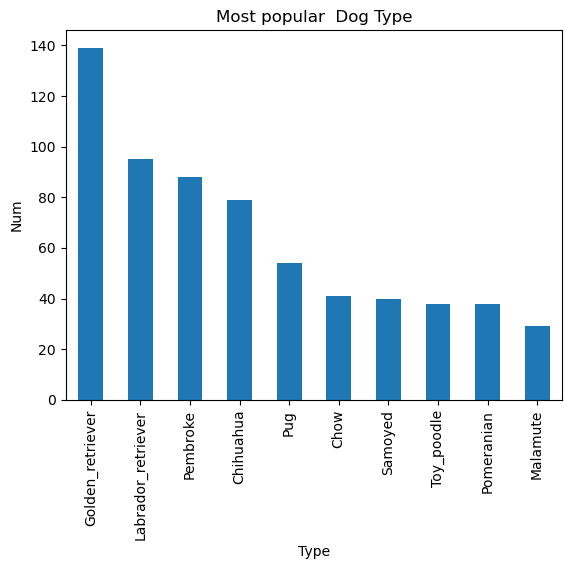

In [124]:
import matplotlib.pyplot as plt
df.dog_type.value_counts()[:10].plot(kind = 'bar', title = 'Most popular  Dog Type')
plt.xlabel('Type')
plt.ylabel('Num');

### Insight:
 Golden Retriever and Labrador RetrieverMost People have these types of dog and they are the most popular based on the images tweets

### - What was the most used device in this tweets dataset ?

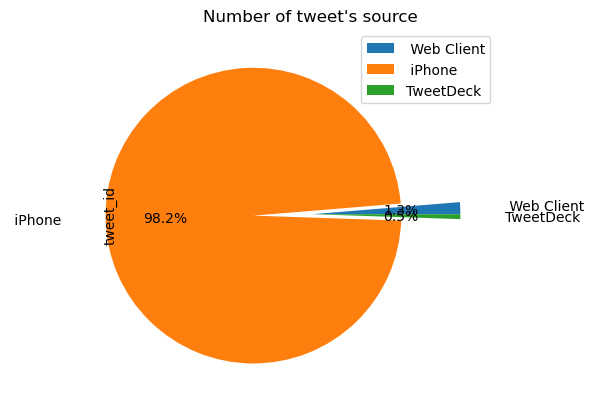

In [125]:
y = df.groupby('source')['tweet_id'].count()
explode = (0, 0.4,0) 
y.plot.pie(autopct='%1.1f%%',explode=explode, labeldistance=1.3)
plt.title("Number of tweet's source ")
plt.legend()
plt.show();

### Insight:
Most tweets came from iPhone

### - How much each ratings repeated in the tweets?

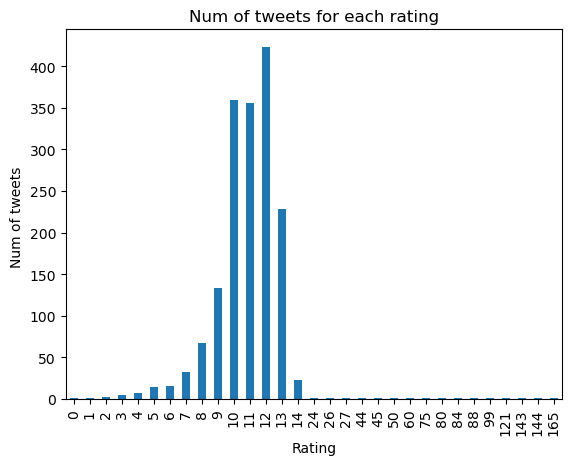

In [126]:
df.groupby('rating_numerator')['tweet_id'].count().plot(kind = 'bar', title = 'Num of tweets for each rating')
plt.xlabel('Rating')
plt.ylabel('Num of tweets ');

### Insight:
- Most of dogs get 10 to 13 ratings out of 10.
- 12 rate was the highest with over 400 tweets

### - What is the favorite dog age based on likes & retweets?

C:\Users\maff3\AppData\Local\Temp\ipykernel_25200\2500068131.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('stage')['favorite_num','retweet_num'].count().plot(kind = 'bar', title = 'The most favorite dog',stacked=True)


Text(0.5, 0, ' Dog Stage ')

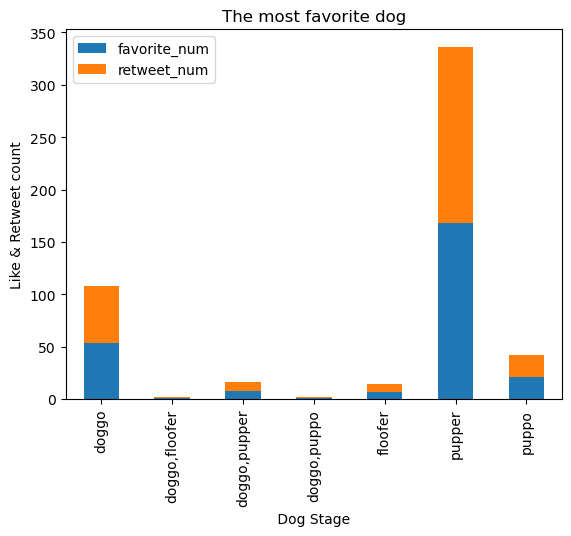

In [127]:
df.groupby('stage')['favorite_num','retweet_num'].count().plot(kind = 'bar', title = 'The most favorite dog',stacked=True)
plt.ylabel("Like & Retweet count")
plt.xlabel(" Dog Stage ")

### Insight: 
We don't have enough data but we can see that pupper was the most famous and lovely dog age

### - What was the most reliable outcome that predicted the type and age of a dog?

In [128]:
# Create a smaple of datafame to help in ploting
df3_dog= pd.DataFrame(df.groupby(['dog_type','stage'])['confident'].mean()[10:-80])
df3_dog_sort= df3_dog.sort_values(['confident'],ascending=False)
df3_dog_sort2= df3_dog_sort.query("stage != ' '")
df3_dog_sort2

,,confident
dog_type,stage,
Dalmatian,pupper,0.999828
Chow,floofer,0.987997
Briard,pupper,0.982755
Chihuahua,doggo,0.955156
Clumber,pupper,0.946718
Dalmatian,"doggo,pupper",0.845830
Boxer,pupper,0.822379
Chow,puppo,0.808737
Cardigan,puppo,0.806674


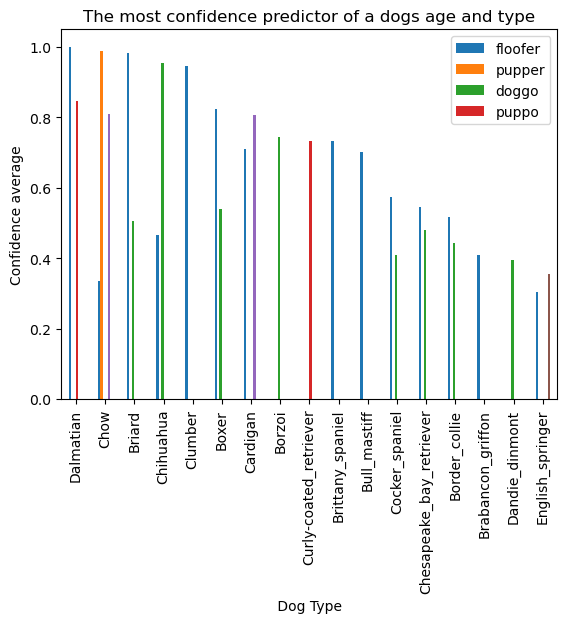

In [129]:
df3_dog_sort2.unstack().plot(kind = 'bar', title = 'The most confidence predictor of a dogs age and type', stacked= False)
lebel=["floofer","pupper","doggo","puppo"]
plt.legend(lebel)
plt.ylabel("Confidence average")
plt.xlabel(" Dog Type ");

### Insight:
We can observe the ( Dalmatian) has the highest rate of confidence and this means the model able to predict this type of dog and this type mostly from floofer stage. Also, the (chow, briard) but with different dog stage. On other hand, the (English_springer) was the less confident dog predication

### - What was the pattern of tweets in the three years observed?

In [130]:
# Extract the year 
year=pd.DatetimeIndex(df['timestamp']).year
year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='timestamp', length=1686)

In [131]:
# Extract the month 
month=pd.DatetimeIndex(df['timestamp']).month
month

Int64Index([ 8,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='timestamp', length=1686)

In [132]:
# Group the sub of dataset 
pivot = df.pivot_table(index=[year,month], values=['tweet_id'], aggfunc={"count"})
pivot

tweet_id
                       count
timestamp timestamp         
2015      11             226
          12             289
2016      1              141
          2               96
          3              107
          4               50
          5               48
          6               69
          7               78
          8               47
          9               57
          10              60
          11              45
          12              52
2017      1               59
          2               60
          3               44
          4               34
          5               36
          6               41
          7               46
          8                1

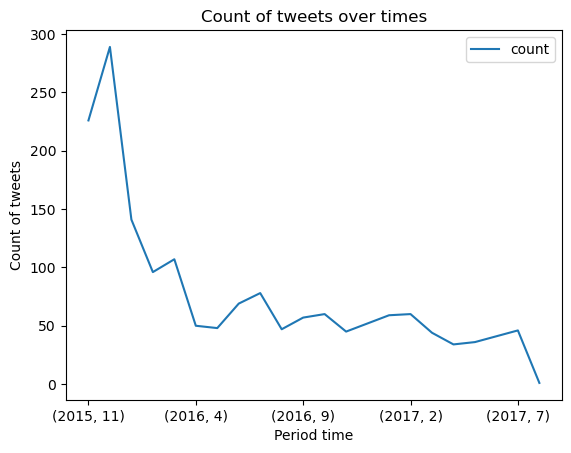

In [133]:
pivot['tweet_id'].plot( kind='line')
x = pivot.index
y = pivot["tweet_id"]
plt.xlabel('Period time')
plt.ylabel("Count of tweets")
plt.title('Count of tweets over times')
plt.show();

### Insight:
There were more tweets the first year and then the number shrink , so we think most of the dog predictions date back to 2015.

In [134]:
# Calculate the number of image in each year 
image = df.pivot_table(index=[year], values=['jpg_url'], aggfunc={"count"})
image

,jpg_url
,count
timestamp,
2015,515
2016,850
2017,321


We can now agree that you don't have to have more tweets to get more pictures

### - Is there any relationship between the numbers of likes and retweets ?

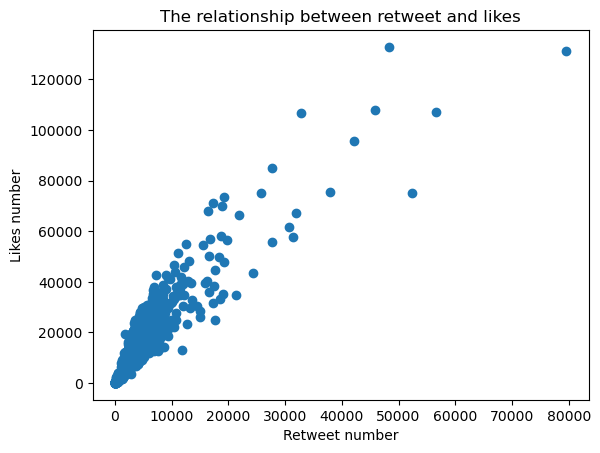

In [135]:
plt.scatter(df.retweet_num, df.favorite_num)
plt.title('The relationship between retweet and likes')
plt.xlabel("Retweet number")
plt.ylabel('Likes number');

### Insight:
As we can see there is a positive relationship between both variables. The more the tweet is being retweeted the more it gets likes